<center><h1>
تمرین عملی دوم
</h1></center>

<div dir="rtl">
در این تمرین می‌خواهیم یک بازی ساده و تاثیر تکرار بازی را با هم بررسی کنیم. در هر مرحله کافی‌ست توابع معرفی‌شده را پیاده‌سازی کنید.

لطفا برای اطمینان از محل اجرا، قطعه‌کد پایین را اجرا کنید.
</div>

In [11]:
# %%bash
# if [ ! -d game_environment ]; then
#     echo "Please run from the directory where game_environment directory is placed."
#     exit -1
# fi

! pip install matplotlib
! pip install numpy

<div dir="rtl">
<h2>یک تصمیم ساده (۵ نمره)</h2>
در این بازی می‌خواهیم مبلغی را بین دو نفر پخش کنیم. در صورتی که دو نفر به توافق برسند، مبلغ مطابق توافق آن‌ها بین‌شان پخش می‌گردد، در غیر این‌صورت به هیچ‌یک از آن‌ها مبلغی تعلق نمی‌گیرد.

برای پیاده‌سازی بازی لازم است توابع `generate_offer` و `receive_offer` را در قطعه‌کد زیر پیاده‌سازی کنید.

تابع `generate_offer` در ورودی خود مقداری که باید پخش شود را ورودی گرفته و در خروجی یک دوتایی برمی‌گرداند که مقدار اول سهم خودش از توافق را مشخص می‌کند و مقدار دوم سهم نفر دیگر را. بدیهی‌ست که باید مجموع این دو مقدار برابر با کل مقدار دریافتی باشد.

تابع `receive_offer` یک دوتایی دریافت می‌کند که مقدار اول سهم نفر دیگر از توافق و مقدار دوم سهم بازیکن را از توافق مشخص می‌کند. تضمین می‌شود که مجموع این دو مقدار برابر کل مقداری‌ست که باید پخش شود. در خروجی این تابع در صورت تایید توافق مقدار `True` و در غیر این‌صورت باید مقدار `False` برگردانده شود.

In [18]:
from typing import Tuple
from game_environment import Strategy

class MySimpleStrategy(Strategy):
    def generate_offer(self, value: int, **kwargs):
        # TODO: Your code here.
        to_return = (value/2, value/2)
        return to_return
        
    def receive_offer(self, offer: Tuple[int, int], **kwargs):
        # TODO: Your code here.
        if offer[1] >= offer[0]:
            return True
        return False


<div dir="rtl"> <font color="green">
این قسمت را با توضیح استراتژی استفاده‌شده توسط شما در قسمت قبل (علت بهینه بودن آن بدون داشتن اطلاعات بیشتر) کامل کنید.
</font></div>

<div dir="rtl">
حال یک جامعه‌ی ۲۰ نفره در نظر می‌گیریم و همچنین علاوه بر استراتژی مشخص‌شده توسط شما، از چند استراتژی دیگر هم استفاده می‌کنیم. نحوه‌ی عملکرد این استراتژی‌ها را در قطعه‌کد زیر می‌توانید مشاهده کنید.

در ده‌هزار مرحله، در هر مرحله دو فرد تصادفی از جامعه انتخاب می‌کنیم و بین آن دو یک بازی برگزار می‌کنیم. نتایج را با تهیه‌ی پلات می‌توانید مشاهده کنید.
</div>

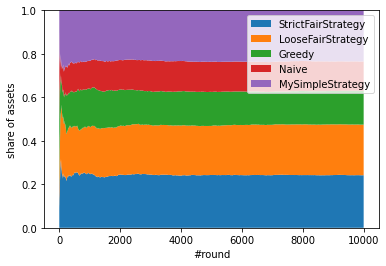

Final share of assets:
* StrictFairStrategy:		24%
* LooseFairStrategy:		23%
* Greedy:		16%
* Naive:		14%
* MySimpleStrategy:		23%


In [19]:
from game_environment import GameConfiguration, GameRunner, Strategy


class StrictFairStrategy(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value / 2, value / 2]

    def receive_offer(self, offer, **kwargs):
        return offer[1] >= offer[0]


class LooseFairStrategy(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value / 2, value / 2]

    def receive_offer(self, offer, **kwargs):
        return offer[1] > 0


class Greedy(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value * 99 / 100, value / 100]

    def receive_offer(self, offer, **kwargs):
        return offer[1] >= offer[0] * 90


class Naive(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value / 100, value * 99 / 100]

    def receive_offer(self, offer, **kwargs):
        return offer[1] > 0


game_configuration = GameConfiguration(
    strategies=[StrictFairStrategy() for i in range(4)]
    + [LooseFairStrategy() for i in range(4)]
    + [Greedy() for i in range(4)]
    + [Naive() for i in range(4)]
    + [MySimpleStrategy() for i in range(4)],
    games=10000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


<div dir="rtl"> <font color="green">
این قسمت را با توجیه نمودار ساخته‌شده کامل کنید. توجه کنید تنها در صورتی نمره‌ی این قسمت را می‌گیرید که در نهایت استراتژی شما بیش از یک پنجم سرمایه تولید‌شده را دارا باشد.
</font></div>
توجیه: استراتژی من این است که یک کار بدون ریسک انجام دهم و اگر پیشنهادی که میدهد بیش از نصف یا مساوی با آن بود قبول کنم و
همچنین موقع پیشنهاد دادن نیز نصف نصف پیشنهاد میدهم.
همانطور که میبینیم عدد این سیاست بسیار نزدیک به دو سیاست ابتدایی است که دلیل آن نیز این است که 
تابع پیشنهاد اینها یکسان است و تابع پذیرش آنها نیز در یکی یکسان است و در دیگری متفاوت است اما تفاوت خاصی در امید ریاضی نمیکند
همانطوری که در خروجی نیز میبینیم!

<div dir="rtl">
<h2>یک تصمیم سخت (۲۰ + ۱۰ نمره)</h2>
در این قسمت می‌خواهیم تاثیر اعتبار بر این بازی را بررسی کنیم. برای این کار، در هنگام ارائه‌ی پیشنهاد و دریافت آن علاوه بر موارد قبلی که دریافت می‌کردید، لیستی از مذاکراتی که قبلا انجام شده هم دریافت می‌کنید.

به عنوان مثال یک استراتژی نمونه در اختیارتان قرار گرفته است. در این استراتژی، در صورتی که دارایی شخص بیشتر از طرف مقابل باشد، کل مبلغ (و یا آن‌چه او پیشنهاد داده) را به او می‌بخشد و در غیر این صورت، در غیر این‌صورت به او پیشنهاد یک درصد مبلغ را می‌دهد و یا تنها در صورتی پیشنهاد او را قبول می‌کند که اکیدا به نفع او باشد.

شما هم استراتژی‌های زیر را پیاده‌سازی کنید:

تعریف: یک فرد را طمع‌کار می‌نامیم اگر در بیش از نیمی از مذاکرات موفقش، بیش از نیمی از مبلغ را برداشته باشد.

1. به هر شخصی پیشنهاد عادلانه‌ی نصف مبلغ را بدهد و به افراد طمع‌کار پیشنهاد یک درصد مبلغ را بدهد تا تنبیه شوند. همچنین هر پیشنهادی را قبول کند مگر این که شخص طمع‌کاری پیشنهادی کمتر از نصف مبلغ داده‌باشد. این استراتژی را `AntiGreedy` می‌نامیم.
1. هنگام دریافت پیشنهاد هر پیشنهاد بزرگ‌تر از صفری را قبول می‌کند و هنگام ارائه‌ی پیشنهاد در صورتی که حداقل نیمی از مذاکرات طرف مقابل با افراد طمع‌کار به توافقی با حداقل نصف مبلغ به سود فرد طمع‌کار تمام‌شده باشد، پیشنهاد یک درصد مبلغ را می‌دهد و در غیر این‌صورت نیمی از مبلغ را پیشنهاد می‌دهد. این استراتژی را `GeniusGreedy` می‌نامیم.
1. در هنگام دریافت پیشنهاد، در صورتی که بزرگتر از صفر باشد آن را قبول می‌کند و در هنگام ارائه‌ی پیشنهاد در صورتی که در آخرین بازی‌ای که طرف مقابل پیشنهاد ارائه داده، برای خودش مبلغ کمترمساوی نصف مبلغ را قرار داده باشد، به او کل مبلغ را پیشنهاد می‌دهد و در غیر این‌صورت نیمی از مبلغ را پیشنهاد می‌دهد. این استراتژی را `FairSupporter` می‌نامیم.
1. یک استراتژی مدنظر شما.

پس از پیاده‌سازی این سناریوها مطابق قسمت قبل، جامعه‌ای ۲۰ نفره با این افراد درست کنید و نشان دهید چگونه تغییر نسبت افراد به نتایج مختلفی در توزیع نهایی دارایی منجر می‌شود.


در نهایت استراتژی آخر هر یک از دانشجویان در یک جامعه قرار می‌گیرند و ۱۰ نمره از این قسمت مطابق عملکرد استراتژی در آن جامعه منظور می‌گردد.
</div>

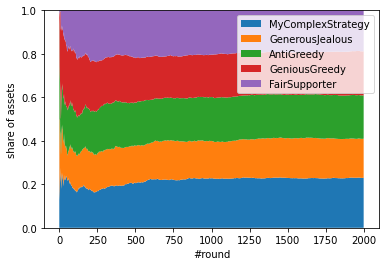

Final share of assets:
* MyComplexStrategy:		23%
* GenerousJealous:		18%
* AntiGreedy:		20%
* GeniousGreedy:		20%
* FairSupporter:		19%


In [20]:
from game_environment import GameConfiguration, GameRunner, Strategy
from typing import Any, Dict, List, Tuple

def is_tamakar_finder(previous_games, receiver_idx):
    all_games_accepted = 0
    all_games_accepted_more_than_half = 0
    for game in previous_games:
        if game['accepted'] == True:
            giver = game['initial giver']
            receiver = game['initial receiver']
            if giver == receiver_idx:
                all_games_accepted += 1
                offer = game['offers'][0]
                if offer[0] > offer[1]:
                    all_games_accepted_more_than_half += 1
            elif receiver == receiver_idx:
                all_games_accepted += 1
                offer = game['offers'][0]
                if offer[1] > offer[0]:
                    all_games_accepted_more_than_half += 1
    return all_games_accepted_more_than_half * 2 > all_games_accepted

def is_too_sari_khor_finder(previous_games, receiver_idx):
    all_games = 0
    all_games_defeated = 0
    for game in previous_games:
        giver = game['initial giver']
        receiver = game['initial receiver']
        
        if receiver == receiver_idx:
            if is_tamakar_finder(previous_games, giver):
                all_games += 1
                if game['accepted'] and game['offers'][0][0] >= game['offers'][0][1]:
                    all_games_defeated += 1
        elif giver == receiver_idx:
            if is_tamakar_finder(previous_games, receiver):
                all_games += 1
                if game['accepted'] and game['offers'][0][1] >= game['offers'][0][0]:
                    all_games_defeated += 1
    return all_games_defeated * 2 > all_games


def is_it_good(previous_games, receiver_idx):
    answer = False
    for game in previous_games:
        giver = game['initial giver']
        if giver == receiver_idx:
            offer = game['offers'][0]
            answer = offer[0] <= offer[1]
    return answer
        


class MyComplexStrategy(Strategy):
    """
    Each game is represented by a dictionary:
    {
        "initial giver": player_idx (int),
        "initial receiver": player_idx (int),
        "offers": List of offers where each entry is a tuple
                    where the first entry represents initial giver's
                    share and second entry represents initial
                    receiver's share. Here the list has only one offer
                    as the decision has to be made then. (List[Tuple[int, int]])
        "accepted": If the last offer was accepted. (bool)
    }
    """

    def generate_offer(
        self,
        value: int,
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        receiver_idx: int,
    ):
        boolean = False
        sum_ = []
        for game in previous_games:
            if game['accepted']:
                if game['initial receiver'] == receiver_idx:
                    sum_.append(game['offers'][0][1])
                    boolean = True


        if boolean:
            second = int(sum(sum_)/len(sum_))
            return (value - second, second)
        return (value/2, value/2)

    def receive_offer(
        self,
        offer: Tuple[int, int],
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        giver_idx: int,
    ):
        return offer[1] > (offer[0] + offer[1]) * 0.4


class GenerousJealous(Strategy): #DONE
    def get_assets(self, previous_games):
        assets = {}
        for game in previous_games:
            if game["initial giver"] not in assets:
                assets[game["initial giver"]] = 0
            if game["initial receiver"] not in assets:
                assets[game["initial receiver"]] = 0
            if game["accepted"]:
                assets[game["initial giver"]] += game["offers"][-1][0]
                assets[game["initial receiver"]] += game["offers"][-1][1]
        return assets

    def generate_offer(self, value, previous_games, your_idx, receiver_idx):
        assets = {your_idx: 0, receiver_idx: 0}
        assets.update(self.get_assets(previous_games))
        if assets[your_idx] < assets[receiver_idx]:
            return [value * 99 / 100, value / 100]
        else:
            return [value / 100, value * 99 / 100]

    def receive_offer(self, offer, previous_games, giver_idx, your_idx):
        assets = {your_idx: 0, giver_idx: 0}
        assets.update(self.get_assets(previous_games))
        if assets[your_idx] < assets[giver_idx]:
            return offer[1] > offer[0]
        return True



class AntiGreedy(Strategy): #DONE
    def get_assets(self, previous_games):
        assets = {}
        for game in previous_games:
            if game["initial giver"] not in assets:
                assets[game["initial giver"]] = 0
            if game["initial receiver"] not in assets:
                assets[game["initial receiver"]] = 0
            if game["accepted"]:
                assets[game["initial giver"]] += game["offers"][-1][0]
                assets[game["initial receiver"]] += game["offers"][-1][1]
        return assets

    def generate_offer(self, value, previous_games, your_idx, receiver_idx):

        is_tamakar = is_tamakar_finder(previous_games, receiver_idx)
        if is_tamakar:
            return [value * 99/100, value * 1/100]
        else:
            return [value/2, value/2]


    def receive_offer(self, offer, previous_games, giver_idx, your_idx):
        is_tamakar = is_tamakar_finder(previous_games, giver_idx)
        if is_tamakar:
            return offer[1] >= offer[0]
        else:
            return True

class GeniousGreedy(Strategy): #DONE
    def get_assets(self, previous_games):
        assets = {}
        for game in previous_games:
            if game["initial giver"] not in assets:
                assets[game["initial giver"]] = 0
            if game["initial receiver"] not in assets:
                assets[game["initial receiver"]] = 0
            if game["accepted"]:
                assets[game["initial giver"]] += game["offers"][-1][0]
                assets[game["initial receiver"]] += game["offers"][-1][1]
        return assets

    def generate_offer(self, value, previous_games, your_idx, receiver_idx):
        boolean = is_too_sari_khor_finder(previous_games, receiver_idx)
        if boolean:
            return [value * 99 / 100, value / 100]
        else:
            return [value/2, value/2]
    
            

    def receive_offer(self, offer, previous_games, giver_idx, your_idx):
        return offer[1] > 0
        
class FairSupporter(Strategy): #DONE
    def get_assets(self, previous_games):
        assets = {}
        for game in previous_games:
            if game["initial giver"] not in assets:
                assets[game["initial giver"]] = 0
            if game["initial receiver"] not in assets:
                assets[game["initial receiver"]] = 0
            if game["accepted"]:
                assets[game["initial giver"]] += game["offers"][-1][0]
                assets[game["initial receiver"]] += game["offers"][-1][1]
        return assets

    def generate_offer(self, value, previous_games, your_idx, receiver_idx):
        boolean = is_it_good(previous_games, receiver_idx)
        if boolean:
            return [value, 0]
        else:
            return [value/2, value/2]

    def receive_offer(self, offer, previous_games, giver_idx, your_idx):
        return offer[1] > 0

game_configuration = GameConfiguration(
    strategies=[MyComplexStrategy() for i in range(4)]
    + [GenerousJealous() for i in range(4)]
    + [AntiGreedy() for i in range(4)]
    + [GeniousGreedy() for i in range(4)]
    + [FairSupporter() for i in range(4)],
    games=2000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


<div dir="rtl">
<h2>دو تصمیم ساده (۱۵ نمره)</h2>
در این قسمت مشابه قسمت قبل، اطلاعی از شخصیت و یا استراتژی طرف مقابل ندارید، با این حال در صورتی که پیشنهاد طرف مقابل را نپذیرید، می‌توانید یک پیشنهاد متقابل به او ارائه دهید.

مثلا فرض کنید طرف مقابل به شما پیشنهاد می‌دهد که تمام مقدار را خودش بردارد. در صورتی که در `receive_offer` مقدار `True` برگردانید، توافق مطابق قسمت قبل انجام می‌شود، در غیر این‌صورت تابع `generate_offer` شما صدا زده می‌شود تا پیشنهادی متقابل ارائه کنید. شرایط این پیشنهاد مطابق یک پیشنهاد عادی‌ست.

برای این که بتوانید حالت کنونی خود را به خوبی دنبال کنید، در ابتدای هر دوره از مذاکرات، تابع `start_round` صدا زده می‌شود.

مشابه قسمت قبل چند استراتژی ساده‌ی دیگر وجود دارند که با آن‌ها رقابت می‌کنید.
</div>

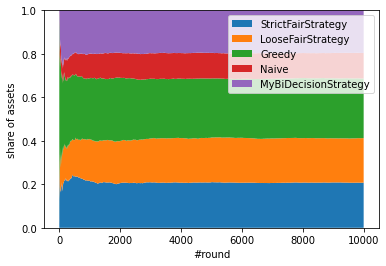

Final share of assets:
* StrictFairStrategy:		21%
* LooseFairStrategy:		21%
* Greedy:		27%
* Naive:		12%
* MyBiDecisionStrategy:		20%


In [33]:
from game_environment import GameConfiguration, GameRunner, Strategy


class MyBiDecisionStrategy(Strategy):
    def start_round(self):
        # [OPTIONAL] TODO: Your code here.
        ...
        self.previous_offers = []

    def generate_offer(self, value, **kwargs):
        # TODO: Your code here.
        if len(self.previous_offers) == 0:
            self.previous_offers.append((value/2, value/2))
            return (value/2, value/2)
        else:
            last_ = self.previous_offers[-1]
            self.previous_offers.append((last_[0] + 1, last_[1] - 1))
            return (last_[0] - 1, last_[1] + 1)


    def receive_offer(self, offer, **kwargs):
        # TODO: Your code here.
        self.previous_offers.append(offer)
        if offer[1] < offer[0]:
            return self.generate_offer(offer[0] + offer[1])
        return offer[1] >= offer[0]


game_configuration = GameConfiguration(
    strategies=[StrictFairStrategy() for i in range(4)]
    + [LooseFairStrategy() for i in range(4)]
    + [Greedy() for i in range(4)]
    + [Naive() for i in range(4)]
    + [MyBiDecisionStrategy() for i in range(4)],
    games=10000,
    offers=2,
    player2_offers=True,
)
games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


<div dir="rtl"> <font color="green">
در این قسمت استراتژی خود را توجیه کنید. همچنین در صورتی استراتژی شما در مقابل یک بازیکن منطقی بهینه، نیست با بیان و اثبات استراتژی بهینه، توضیح دهید چرا در این شرایط این استراتژی را ترجیح دادید. توجه کنید تنها در صورتی نمره‌ی این قسمت را می‌گیرید که در نهایت استراتژی شما بیش از یک پنجم سرمایه تولید‌شده را دارا باشد.
</font></div>

<div dir="rtl">
<h2>چند تصمیم ساده (۲۰+۱۰ نمره)</h2>
در این قسمت مشابه قسمت قبل، اطلاعی از شخصیت و یا استراتژی طرف مقابل ندارید، و می‌توانید در صورتی که پیشنهاد طرف مقابل را نپذیرید، یک پیشنهاد متقابل به او ارائه دهید اما این روند پیشنهاد متقابل `k` بار ادامه پیدا می‌کند و در هر مرحله هر کس بعد از رد کردن پیشنهاد، یک پیشنهاد متقابل ارائه می‌کند. به عبارت دیگر قسمت قبل، حالت خاصی با `k=2` است.

مشابه قسمت قبل از استراتژی‌های دیگر در کنار استراتژی خود استفاده کنید و نتیجه را با `k=5` و `k=10` نمایش دهید. توجه کنید که `k` را با استفاده از متغیر `offers` می‌توانید در تنظیمات بازی مشخص کنید.

مشابه قبل، یک جامعه‌ی دیگر با دانشجوهای درس تشکیل می‌شود و با یک `k` ثابت، بازی‌ها انجام می‌شوند. لطفا استراتژی خود را برای این جامعه هم مشخص کنید. عملکرد شما در این بخش، ۱۰ نمره از این قسمت را در بر می‌گیرد.
</div>

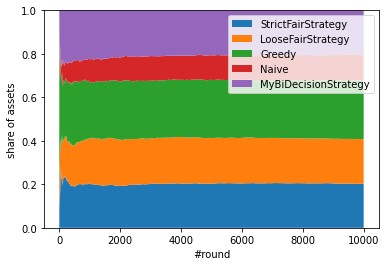

Final share of assets:
* StrictFairStrategy:		20%
* LooseFairStrategy:		21%
* Greedy:		27%
* Naive:		12%
* MyBiDecisionStrategy:		20%


In [34]:
from game_environment import GameConfiguration, GameRunner, Strategy

# TODO: Your code here

## K = 5

game_configuration = GameConfiguration(
    strategies=[StrictFairStrategy() for i in range(4)]
    + [LooseFairStrategy() for i in range(4)]
    + [Greedy() for i in range(4)]
    + [Naive() for i in range(4)]
    + [MyBiDecisionStrategy() for i in range(4)],
    games=10000,
    offers=5,
    player2_offers=True,
)
games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))

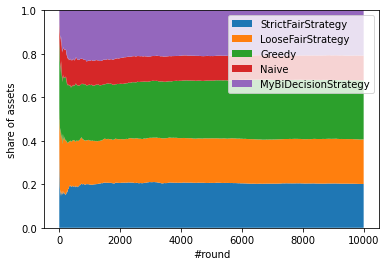

Final share of assets:
* StrictFairStrategy:		20%
* LooseFairStrategy:		20%
* Greedy:		27%
* Naive:		11%
* MyBiDecisionStrategy:		21%


In [35]:

game_configuration = GameConfiguration(
    strategies=[StrictFairStrategy() for i in range(4)]
    + [LooseFairStrategy() for i in range(4)]
    + [Greedy() for i in range(4)]
    + [Naive() for i in range(4)]
    + [MyBiDecisionStrategy() for i in range(4)],
    games=10000,
    offers=10,
    player2_offers=True,
)
games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))

<div dir="rtl"> <font color="green">
در این قسمت استراتژی خود را توجیه کنید. همچنین توضیح دهید گذر از `k=5` به `k=10` چه تغییری در نتیجه‌ی هر مذاکره به وجود می‌آورد. علاوه بر این نشان دهید که هر سری از مذاکرات با `k` مرحله با فرض بازیکن‌های منطقی به چه نتیجه‌ی نهایی‌ای می‌رسد.
</font></div>

تغییر خاصی در کد ایجاد نمیکند در کد من، در واقع تغییر کمی ایجاد میکند.
احتمالا تفاوت خاصی نکند بیش از 2 مرحله ببریم یعنی چه عدد 5 چه عدد 10 چراکه 
با فرض منطقی بودن ایجنت ها، یک سری محاسبات دارند انجام میدهند که تاثیری ندارد بررسی بیش از آن بر روی آنها..
همچنین در حال آفرهای متوالی هستند و از دور دوم به بالاتر آفرهای آنها مهم نیست.